# Não é bruxaria, é Pandas

<video controls src="bruxaria.mp4">

In [4]:
import pandas as pd

In [5]:
from pandas import Series, DataFrame

## Series

In [6]:
s = pd.Series(['abacate', 7, -5, 3.1415])
print (s)

0    abacate
1          7
2         -5
3     3.1415
dtype: object


In [7]:
print (s.values)
print (s.index)

['abacate' 7 -5 3.1415]
RangeIndex(start=0, stop=4, step=1)


In [8]:
f = pd.Series('abacate banana caju damasco'.split(), index='a b c d'.split())
print (f.index)

Index(['a', 'b', 'c', 'd'], dtype='object')


In [9]:
f['c'] = 'cupuaçu'
print (f.values)

['abacate' 'banana' 'cupuaçu' 'damasco']


In [10]:
[x for x in f.values if len(x) < 7]

['banana']

In [11]:
'banana' in f.values

True

In [12]:
'uva' in f.values

False

In [13]:
j = {'SP': 212575, 'BA':24446, 'RJ': 49882, 'MG':47245, 'SC': 6790, 'RS':13177}
s = pd.Series(j)
print (s.values, s.index)

[212575  24446  49882  47245   6790  13177] Index(['SP', 'BA', 'RJ', 'MG', 'SC', 'RS'], dtype='object')


## DataFrame

In [14]:
import requests
import json
url = 'http://www.omdbapi.com/?t=Stranger Things&Season=2&apikey=e25dd5fa'
data = requests.get(url).content
data = json.loads(data)
print (data['Episodes'])

[{'Title': 'Chapter One: MADMAX', 'Released': '2017-10-27', 'Episode': '1', 'imdbRating': '8.4', 'imdbID': 'tt6020684'}, {'Title': 'Chapter Two: Trick or Treat, Freak', 'Released': '2017-10-27', 'Episode': '2', 'imdbRating': '8.5', 'imdbID': 'tt6020792'}, {'Title': 'Chapter Three: The Pollywog', 'Released': '2017-10-27', 'Episode': '3', 'imdbRating': '8.7', 'imdbID': 'tt6020796'}, {'Title': 'Chapter Four: Will the Wise', 'Released': '2017-10-27', 'Episode': '4', 'imdbRating': '8.7', 'imdbID': 'tt6020802'}, {'Title': 'Chapter Five: Dig Dug', 'Released': '2017-10-27', 'Episode': '5', 'imdbRating': '9.0', 'imdbID': 'tt6020806'}, {'Title': 'Chapter Six: The Spy', 'Released': '2017-10-27', 'Episode': '6', 'imdbRating': '9.2', 'imdbID': 'tt6020808'}, {'Title': 'Chapter Seven: The Lost Sister', 'Released': '2017-10-27', 'Episode': '7', 'imdbRating': '6.2', 'imdbID': 'tt6020810'}, {'Title': 'Chapter Eight: The Mind Flayer', 'Released': '2017-10-27', 'Episode': '8', 'imdbRating': '9.3', 'imdbID

In [15]:
df = pd.DataFrame(data['Episodes'])
print (df)

  Episode    Released                               Title     imdbID  \
0       1  2017-10-27                 Chapter One: MADMAX  tt6020684   
1       2  2017-10-27  Chapter Two: Trick or Treat, Freak  tt6020792   
2       3  2017-10-27         Chapter Three: The Pollywog  tt6020796   
3       4  2017-10-27         Chapter Four: Will the Wise  tt6020802   
4       5  2017-10-27               Chapter Five: Dig Dug  tt6020806   
5       6  2017-10-27                Chapter Six: The Spy  tt6020808   
6       7  2017-10-27      Chapter Seven: The Lost Sister  tt6020810   
7       8  2017-10-27      Chapter Eight: The Mind Flayer  tt6020812   
8       9  2017-10-27              Chapter Nine: The Gate  tt6020876   

  imdbRating  
0        8.4  
1        8.5  
2        8.7  
3        8.7  
4        9.0  
5        9.2  
6        6.2  
7        9.3  
8        9.5  


### Estabelecimentos e Serviços de Saúde PMSP 

In [16]:
import matplotlib.pyplot as plt
#http://dados.prefeitura.sp.gov.br/dataset/cadastro-dos-estabelecimentos-de-saude/resource/86addd0c-ccce-46c3-9f3b-a454ce8a4234
#Guilherme Hiroki, Gabriel Dornelas
legendas = 'Leste Sul Norte Oeste Centro'.split()
dados = pd.read_excel('deinfosacadsau2014.xls',
                      sheetname='DEINFO_SA_CADSAU_2014')
print (dados.head())

   ID      LONG       LAT          SETCENS          AREAP  CODDIST  \
0   1 -46490063 -23522787  355030864000052  3550308005143       65   
1   2 -46773393 -23673297  355030819000016  3550308005232       19   
2   3 -46651898 -23531575  355030869000001  3550308005027       70   
3   4 -46454974 -23538945  355030837000019  3550308005202       36   
4   5 -46539564 -23599363  355030872000050  3550308005158       74   

        DISTRITO  CODSUBPREF             SUBPREF REGIAO5   ...      TELEFONE  \
0     PONTE RASA          22  ERMELINO MATARAZZO   Leste   ...    22800080.0   
1  CAPAO REDONDO          17         CAMPO LIMPO     Sul   ...    58742846.0   
2  SANTA CECILIA           9                  SE  Centro   ...    38260096.0   
3       ITAQUERA          27            ITAQUERA   Leste   ...    62860015.0   
4      SAO LUCAS          29       VILA PRUDENTE   Leste   ...           NaN   

         CEP            CNES SA_DEPADM     DEPADM  SA_TIPO  \
0  3680000.0  6393608.000000        

c:\users\iago\appdata\local\programs\python\python37-32\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


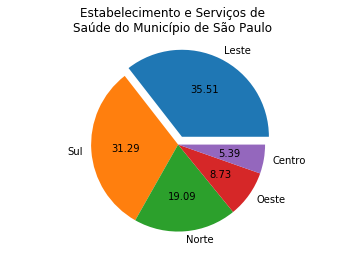

In [17]:
plt.axis('equal')
plt.pie(dados['REGIAO5'].value_counts(), autopct="%.2f",
        labels=legendas, explode = [0.1,0,0,0,0])
plt.suptitle("Estabelecimento e Serviços de\nSaúde do Município de São Paulo")

plt.show()

### Despesas dos Deputados Federais (mensal) 

In [18]:
#https://dadosabertos.camara.leg.br/swagger/api.html
#Celso Tomisaki, Claudio Jayme
dtf = pd.read_csv('./Ano-2017.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')
dtf.head()

,txNomeParlamentar,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,4,2017,0,NaN,NaN,1377952,5828.0,0,3074,6266962
1,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,10,2017,0,NaN,NaN,1430312,5993.0,0,3074,6408821
2,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306682
3,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306518
4,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306675


In [19]:
dtf.columns

Index(['txNomeParlamentar', 'idecadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento'],
      dtype='object')

In [20]:
dtf['vlrDocumento']

0          296.00
1          175.00
2          100.00
3          150.00
4           60.00
5           50.00
6           80.00
7           75.00
8         4007.06
9         4009.82
10        3504.73
11        4095.43
12        3564.30
13        1901.06
14        1964.27
15        2019.58
16        1994.25
17         100.00
18          50.00
19          70.00
20         198.18
21         150.00
22         100.00
23         189.99
24          80.00
25         100.00
26          50.00
27         100.00
28          80.00
29         120.00
           ...   
272969     396.00
272970      65.00
272971       0.10
272972     264.00
272973      42.00
272974      39.00
272975     399.00
272976      84.00
272977     624.00
272978     200.00
272979     200.00
272980     183.00
272981     200.00
272982    -745.00
272983     148.00
272984      62.00
272985     -49.00
272986     -86.00
272987     198.10
272988      91.00
272989     -67.00
272990       6.00
272991    -190.00
272992     -44.00
272993    

In [18]:
sum(dtf['vlrDocumento'])

181523611.26003507

In [24]:
dt_f = dtf.groupby(['numMes','txtDescricao']).apply(lambda x: x['vlrDocumento'].sum())

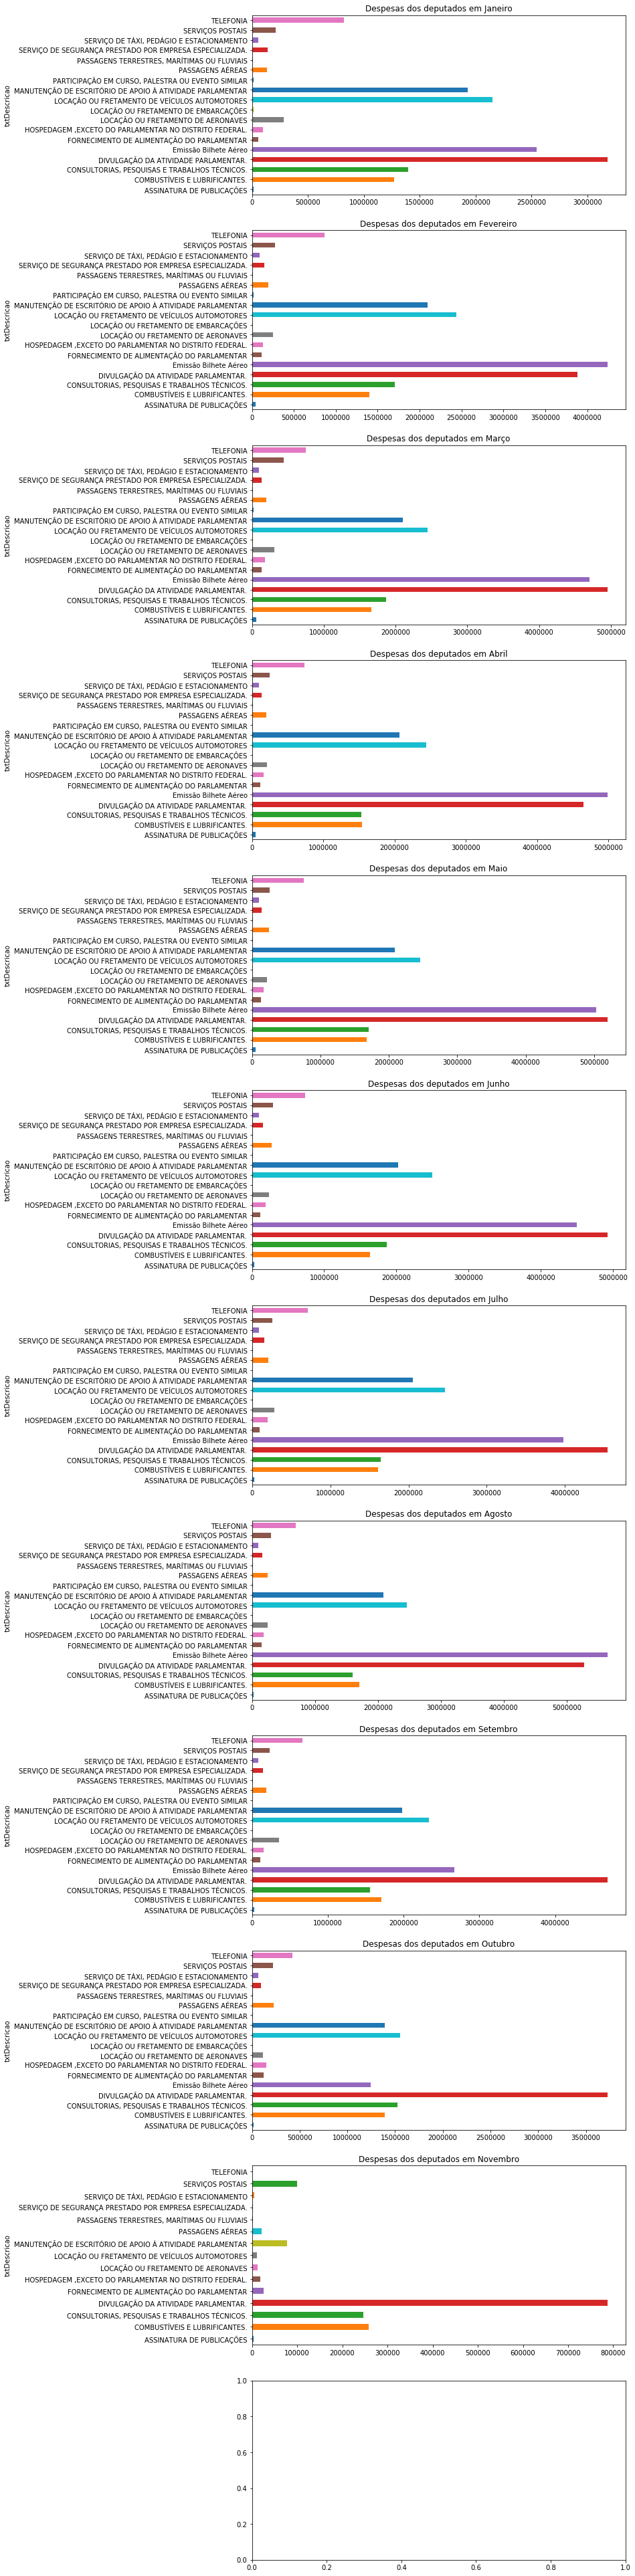

In [25]:
%matplotlib inline
fig, axes = plt.subplots(nrows=12, ncols=1)
mes = 'Janeiro Fevereiro Março Abril Maio Junho Julho Agosto Setembro Outubro Novembro Dezembro'.split()
for x in range(11):
    dt_f[x+1].plot.barh(ax = axes[x],figsize=(10,70),
                        title=(f'Despesas dos deputados em {mes[x]}'))

### Análise do Sentimento em relação ao termo Lava Jato (época filme)

In [ ]:
#Não esquecer de levantar o Servidor do MongoDB
#Gabriel Sansigolo, Caique Assis, Eduardo Lima
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

ln = []
lp = []
number_tweet_pos = number_tweet_neg = 0

lista_pos = open("positive-words.txt", "r")

lista_pos = lista_pos.readlines()
for line in lista_pos: lp.append(line.strip())
lista_pos = lp

lista_neg = open("negative-words.txt", "r")

lista_neg = lista_neg.readlines()
for line in lista_neg: ln.append(line.strip())
lista_neg = ln

In [ ]:
client = MongoClient()
db = client.tweet_db_1
tweet_collection = db.tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) 
tweet_cursor = tweet_collection.find()
print (f'Número de tweets {tweet_cursor.count()}')
  
user_cursor = tweet_collection.distinct("user.id")
print (f'Número de usuários únicos {len(user_cursor)}')

In [ ]:
def BMP(s): return "".join((i if ord(i) < 10000 else '\ufffd' for i in s))
  
for document in tweet_cursor:
    number_words_pos = 0
    number_words_neg = 0

    #print (BMP(document["user"]["name"]), BMP(document["text"]), '\n')

    lista=BMP(document["text"]).split()
    for i in range(len(lista)):
        if lista[i] in lista_pos: number_words_pos += 1
        if lista[i] in lista_neg: number_words_neg += 1
            
    if number_words_pos > number_words_neg: number_tweet_pos = number_tweet_pos+1
    if number_words_pos < number_words_neg: number_tweet_neg = number_tweet_neg+1

In [ ]:
labels = 'Tweets Positivos','Tweets Negativos'
sizes = [number_tweet_pos, number_tweet_neg]

fig1, ax1 = plt.subplots()
ax1.set_title('Sentimento dos Tweets Lava Jato (época do filme)')

ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90, colors=['gold', 'lightskyblue'])

ax1.axis('equal') 
plt.show()

### Comparativo das Companhias Aéreas 2012, 2014, 2016

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#http://www.anac.gov.br/assuntos/dados-e-estatisticas/microdados-de-tarifas-aereas-comercializadas
#Lucas Michael Santos

dados2012 = pd.read_csv("2012.csv")
dados2012_1 = dados2012.groupby(
    by=['DESIGNADOR_ICAO_EMPRESA'])['VALOR_TARIFA'].sum()

dados2014 = pd.read_csv("2014.csv")
dados2014_1 = dados2014.groupby(
    by=['DESIGNADOR_ICAO_EMPRESA'])['VALOR_TARIFA'].sum()

dados2016 = pd.read_csv("2016.csv")
dados2016_1 = dados2016.groupby(
    by=['DESIGNADOR_ICAO_EMPRESA'])['VALOR_TARIFA'].sum()

dicionario_siglas={'AAL':'AMERICAN AIRLINES','ACA':'AIR CANADA','AEA':'AIR EUROPA',
          'AEY':'AIR ITALY','AFR':'AIR FRANCE','AMX':'AEROMEXICO',
          'ARG':'AEROLINEAS ARGENTINAS','AVA':'AVIANCA','AWE':'US AIRWAYS',
          'AZA':'ALITALIA','AZU':'AZUL','BAW':'BRITISH AIRWAYS',
          'BOV':'BOA - BOLIVIANA DE AVIACION','CCA':'AIR CHINA','CFG':'CONDOR',
          'CMP':'COPA AIRLINES','COA':'CONTINENTAL AIRLINES',
          'DAL':'DELTA AIRLINES','DLH':'LUFTHANSA','DSM':'LAN ARGENTINA',
          'DTA':'ANGOLA AIRLINES','ELY':'El Al','ETD':'ETIHAD AIRWAYS P.J.S.C',
          'ETH':'ETHIOPIAN AIRLINES ENTERPRISE','FWI':'AIR CARAIBES','GLO':'GOL',
          'IBE':'IBERIA','INC':'INSEL AIR INTERNATIONAL B.V.','ISS':'MERIDIANA FLY S.P.A.',
          'KAL':'KOREAN AIR','KLM':'KLM','LAN':'LAN CHILE','LPE':'LAN PERU',
          'LRC':'LINEAS AEREAS COSTARRICENCES','LXP':'LAN EXPRESS','MSQ':'META',
          'NLU':'INSEL AIR ARUBA N.V','ONE':'OCEANAIR','PUA':'PLUNA','QTR':'QATAR AIRWAYS',
          'RAM':'ROYAL AIR MAROC','SAA':'SOUTH AFRICAN AIRWAYS','SIA':'Singapore Airlines Limited',
          'SLM':'SURINAM','SWR':'SWISS','TAM':'TAM','TAP':'TRANSPORTES AEREOS PORTUGUESES',
          'TCV':'TACV-TRANSP. AEREOS CABO VERDE','THY':'TURKISH AIRLINES','TPU':'TACA PERU',
          'UAE':'EMIRATES','UAL':'UNITED AIR LINES'}

#unificando e filtrando as empresas dos 3 arquivos
siglas_finais=[]
for s in dados2012_1.index:
    if s in dicionario_siglas:
        if dicionario_siglas[s] not in siglas_finais:
            siglas_finais.append(dicionario_siglas[s])

for s in dados2014_1.index:
    if s in dicionario_siglas:
        if dicionario_siglas[s] not in siglas_finais:
            siglas_finais.append(dicionario_siglas[s])

for s in dados2016_1.index:
    if s in dicionario_siglas:
        if dicionario_siglas[s] not in siglas_finais:
            siglas_finais.append(dicionario_siglas[s])
            
#obtendo o tamanho para o X do grafico
x1=range(len(dados2012_1.index))
x2=range(len(dados2014_1.index))
x3=range(len(dados2016_1.index))
x_final=range(len(siglas_finais))

#montando o grafico
b1=plt.bar(x1, dados2012_1.values, color='#F57C00')
b2=plt.bar(x2, dados2014_1.values,color='#039BE5')
b3=plt.bar(x3, dados2016_1.values,color='#D500F9')

plt.xticks(x_final,siglas_finais,rotation='vertical',size=8)
plt.title('Comparativo Companhias Aéreas 2012, 2014 e 2016')
plt.xlabel('Empresas')
plt.ylabel('Valor de Tarifa Total (Mi)')
plt.legend((b1[0], b2[0], b3[0]),('2012','2014','2016'))

plt.subplots_adjust(bottom=0.45,top=0.95)
plt.show()

### PIB per capita (USD) x Expectativa vida (anos)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# mhfsilveira
df = pd.read_csv('http://assets.datacamp.com/course/intermediate_python/gapminder.csv', index_col = 0)
gdp_cap = list(df.gdp_cap)
life_exp = list(df.life_exp)
pop = list(df['population']/1e6)
cont = list(df.cont)
lut = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
}
col = [lut[x] for x in cont]

# Scatter plot
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)

# Customizations
plt.xscale('log') 
plt.xlabel('PIB per Capita [em USD]')
plt.ylabel('Expectativa de Vida [em anos]')
plt.title('World Development 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

plt.text(1550, 70, 'Índia')
plt.text(5700, 78, 'China')
plt.text(42951, 78, 'EUA')
plt.text(9065,72, 'Brasil')

plt.grid(True)
plt.show()

### Comparativo PIB Chile, Uruguai e Brasil pela API do Banco Mundial

In [ ]:
import wbdata
import matplotlib.pyplot as plt
#https://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata 
countries = ["CL","UY","BR"]
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}
 
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

dfu = df.unstack(level=0)

dfu.plot()
plt.legend(loc='best')
plt.title("GNI Per Capita ($USD, Atlas Method)")
plt.xlabel('Date')
plt.ylabel('GNI Per Capita ($USD, Atlas Method')
plt.show()